# Lecture Code - Introduction to Natural Language Processing

<p><a name="sections"></a></p>


## Sections

- <a href="#prepare">Prepare Our Environment</a><br>
- <a href="#corpus">Creating Corpus</a><br>
    - <a href="#stemming">Stemming</a><br>
    - <a href="#ex1">Exercise: Lemmatization</a><br>
- <a href="#pos">POS Tag</a><br>
    - <a href="#ex2">Exercise</a><br>
- <a href="#chunk">Chunk</a><br>
    - <a href="#ex3">Exercise: Syntax Tree/ Chunking</a><br>
- <a href="#classify">Text Classification</a><br>
    - <a href="#ex4">Exercise: Classify the Testing Set</a><br>
- <a href="#lda">Brief Introduction to LDA</a><br>

<p><a name="prepare"></a></p>
## Prepare Our Environment

In [1]:
from bs4 import BeautifulSoup
import urllib2
import re
import nltk
from nltk import *
import numpy as np

### Download everything from NLTK

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection u'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Carlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Carlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\Carlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\Carlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\Carlo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\

<p><a name="corpus"></a></p>
## Creating Corpus

- Scrape the text for the novel, clean it up using regex, and put into a list.

In [2]:
url = "http://gutenberg.net.au/ebooks02/0200041.txt" # url book
text = urllib2.urlopen(url).read() # read HTML
soup = BeautifulSoup(text, 'html.parser') # parse HTML
cleantext = BeautifulSoup.get_text(soup) # remove HTML and JS
cleantext = re.sub( '\s+', ' ', cleantext ).strip() # remove whitespace. https://www.w3schools.com/jsref/jsref_regexp_whitespace.asp
cleantext = cleantext.lower() #lower case
cleantext = re.sub( '[.:\',\-!;"()?]', "", cleantext).strip() # remove puncuation
corpus = cleantext.split(" ") # tokenize text

In [6]:
print len(corpus)
print type(corpus)
print corpus[0:20]

48632
<type 'list'>
[u'\xef\xbb\xbf', u'project', u'gutenberg', u'australia', u'a', u'treasuretrove', u'of', u'literature', u'treasure', u'found', u'hidden', u'with', u'no', u'evidence', u'of', u'ownership', u'title', u'the', u'great', u'gatsby']


** Cleaning the corpus: tokenization **

In [10]:
for x in range(0, len(corpus)): 
    if corpus[x] == "chapter":
        break_number_1 = x 
        break # allows to break the loop when it gets the first chapter
for x in range((len(corpus)-1), 0, -1): 
    if corpus[x] == "end":
        break_number_2 = x + 1 
        break

corpus = corpus[break_number_1 : break_number_2]
#corpus

In [12]:
print break_number_1
print break_number_2
print corpus[0:30]

207
48621
[u'chapter', u'1', u'in', u'my', u'younger', u'and', u'more', u'vulnerable', u'years', u'my', u'father', u'gave', u'me', u'some', u'advice', u'that', u'ive', u'been', u'turning', u'over', u'in', u'my', u'mind', u'ever', u'since', u'whenever', u'you', u'feel', u'like', u'criticizing']


<p><a name="stemming"></a></p>
### Stemming
- This is probably the fist time you see a Python object of some **tasks**.

In [18]:
stemmer = nltk.stem.PorterStemmer() # Create our stemmer => A word stemmer based on the Porter stemming algorithm.
# Porter Stemmer: http://snowball.tartarus.org/algorithms/porter/stemmer.html
stemmed_corpus = [stemmer.stem(word) for word in corpus]
print stemmed_corpus[1:30] # words like years, vulnerable or criticizing are changed 

[u'1', u'in', u'my', u'younger', u'and', u'more', u'vulner', u'year', u'my', u'father', u'gave', u'me', u'some', u'advic', u'that', u'ive', u'been', u'turn', u'over', u'in', u'my', u'mind', u'ever', u'sinc', u'whenev', u'you', u'feel', u'like', u'critic']


**Potential problems**
- What is the result of the code below? what kind of problem do you suspect could arise? How can we fix it?

In [8]:
stemmer = nltk.stem.PorterStemmer() # Create our stemmer 
to_be_stemmed = ["monkeys","possesses", "possess", "dogs", "eating",
"constitutional", "worthy", "relatable", "had", "was", "ties", "ive"]
[stemmer.stem(word) for word in to_be_stemmed]

[u'monkey',
 u'possess',
 u'possess',
 u'dog',
 u'eat',
 u'constitut',
 u'worthi',
 u'relat',
 u'had',
 u'wa',
 u'tie',
 u'ive']

<p><a name="ex1"></a></p>
### Exercise: Lemmatization

- To reduce some of the problem, we might want to add more steps before stemming. For example, we can lemmatize in advance. Look up the documentation, find the function you need for lemmatization, then apply it (in the correct way) to the words below.
    - 'tips', 'criteria', 'minima'
    - 'was', 'wore', 'caught'


In [2]:
lmtizer=nltk.stem.WordNetLemmatizer() 
# Lemmatize using WordNet's built-in morphy function. Returns the input word unchanged if it cannot be found in WordNet.

In [21]:
#### Your code here
print lmtizer.lemmatize('tips')
print lmtizer.lemmatize('criteria')
print lmtizer.lemmatize('minima')

tip
criterion
minimum


In [22]:
print lmtizer.lemmatize('was')
print lmtizer.lemmatize('wore')
print lmtizer.lemmatize('caught')

wa
wore
caught


In [24]:
print lmtizer.lemmatize('was')
print lmtizer.lemmatize('was', 'v')+'\n' # crucial to decide what class each word belongs to (noun, verb or adjective).

print lmtizer.lemmatize('wore')
print lmtizer.lemmatize('wore', 'v')+'\n'

print lmtizer.lemmatize('caught')
print lmtizer.lemmatize('caught', 'v')

wa
be

wore
wear

caught
catch


It is crucial to decide what class each word belongs to (noun, verb or adjective). We will see how this can be done.

<p><a name="pos"></a></p>
## POS Tag

- In order to look up definitions for all of the parts of speech, you can run this command. 

In [11]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

### A different way to token

In [4]:
sentence = """At eight o'clock on Thursday morning Arthur didn't feel very good."""
tokens=nltk.word_tokenize(sentence, language='english')
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

** Compare to the old tokenization**

In [6]:
clean_sentence = re.sub( '\s+', ' ', sentence ).strip()
clean_sentence = clean_sentence.lower()
clean_sentence = re.sub( '[.:\',\-!;"()?]', "", clean_sentence).strip()
old_tokens = clean_sentence.split(" ")
old_tokens

['at',
 'eight',
 'oclock',
 'on',
 'thursday',
 'morning',
 'arthur',
 'didnt',
 'feel',
 'very',
 'good']

It seems our old style is inferior in cases like oclock vs 'o'clock whereas superior for others like didnt vs (did,nt)

In [6]:
tagged = nltk.pos_tag(tokens)
tagged

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('.', '.')]

<p><a name="ex2"></a></p>
#### Exercise

- Consider our `to_be_stemmed` list again.

In [9]:
print to_be_stemmed

['monkeys', 'possesses', 'possess', 'dogs', 'eating', 'constitutional', 'worthy', 'relatable', 'had', 'was', 'ties', 'ive']


If we only need very basic tags (noun, verb and adjective), try passing `'universal'` to the `pos_tag` function?

In [10]:
#### Your code here
tagged = nltk.pos_tag(to_be_stemmed, tagset='universal')

- Now lemmatize the sentence above.

In [11]:
tagged

[('monkeys', u'NOUN'),
 ('possesses', u'VERB'),
 ('possess', u'ADJ'),
 ('dogs', u'NOUN'),
 ('eating', u'VERB'),
 ('constitutional', u'ADJ'),
 ('worthy', u'NOUN'),
 ('relatable', u'NOUN'),
 ('had', u'VERB'),
 ('was', u'VERB'),
 ('ties', u'NOUN'),
 ('ive', u'ADJ')]

In [15]:
# Exercise: do basic tagging using base python and tagged above
mapping={'NOUN':'n', 'VERB':'v', 'ADJ':'a'}
tagged=map(lambda tup: [tup[0], mapping[tup[1]]], tagged)
to_be_stemmed2 = map(lambda x: lmtizer.lemmatize(*x), tagged)

KeyError: 'n'

In [13]:
tagged

[['monkeys', 'n'],
 ['possesses', 'v'],
 ['possess', 'a'],
 ['dogs', 'n'],
 ['eating', 'v'],
 ['constitutional', 'a'],
 ['worthy', 'n'],
 ['relatable', 'n'],
 ['had', 'v'],
 ['was', 'v'],
 ['ties', 'n'],
 ['ive', 'a']]

- Stem it. Compare the result from the old stemming method.

In [19]:
#### Your code here
print [stemmer.stem(word) for word in to_be_stemmed]
print [stemmer.stem(word) for word in to_be_stemmed2]

[u'monkey', u'possess', u'possess', u'dog', u'eat', u'constitut', u'worthi', u'relat', u'had', u'wa', u'tie', u'ive']
[u'monkey', u'possess', u'possess', u'dog', u'eat', u'constitut', u'worthi', u'relat', u'have', u'be', u'tie', u'ive']


### Another example

In [20]:
text=nltk.word_tokenize("And now I present to you the best professor on earth", language='english')
tagged =nltk.pos_tag(text)
tagged

[('And', 'CC'),
 ('now', 'RB'),
 ('I', 'PRP'),
 ('present', 'VBP'),
 ('to', 'TO'),
 ('you', 'PRP'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('professor', 'NN'),
 ('on', 'IN'),
 ('earth', 'NN')]

<p><a name="chunk"></a></p>
## Chunk

Defining patterns in POS helps, for example, to find phrases in a corpus -- especially noun phrases. Let's consider the sentence below (This example os from [The nltk book](http://www.nltk.org/book/ch07.html)):

In [2]:
sentence = 'The little yellow dog barked at the cat.'
sentence

'The little yellow dog barked at the cat.'

- As before we tokenize and tag the tokens.

In [3]:
tokens   = nltk.word_tokenize(sentence.lower())
tagged   = nltk.pos_tag(tokens)
print tagged

[('the', 'DT'), ('little', 'JJ'), ('yellow', 'JJ'), ('dog', 'NN'), ('barked', 'VBD'), ('at', 'IN'), ('the', 'DT'), ('cat', 'NN'), ('.', '.')]


- Then we may use the `RegexpParser` (Regular expression parser) function to do **chunking**: 

In [4]:
grammar = "NP: {<DT>?<JJ>*<NN>}" # tag pattern starting NP (Noun Pronoum) plus 0 or 1 determinants plus 0 or more adjectives and a noun
cp = nltk.RegexpParser(grammar)
result = cp.parse(tagged)
print result

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN)
  ./.)


- The result actually admits a tree structure and can be seen with the `draw()` function (The sketching is not inline here):

In [14]:
# result.draw() WARNING: Jupyter has problems to chart trees so you better do it in Anacanda Prompt

<p><a name="ex3"></a></p>
### Exercise: Syntax Tree/ Chunking

Try chunking:
- `'We live in New York City'` with `grammar = "NP: {<NNP>+}"`.
- `'I went to a baseball game'` with `grammar = "NP: {<NN>+}"`.
- Identify th esubject of the sentence: `'the young tall guy looked at the window'`.

You can visualize the structure with the `draw()` function.

In [25]:
#### Your code here
sentence = 'We live in New York City'
tokens   = nltk.word_tokenize(sentence)
tagged   = nltk.pos_tag(tokens)
grammar = "NP: {<NNP>+}" #sequences of proper nouns
cp = nltk.RegexpParser(grammar)
result = cp.parse(tagged)
print result

(S We/PRP live/VBP in/IN (NP New/NNP York/NNP City/NNP))


In [26]:
sentence = 'I went to a baseball game.'
tokens   = nltk.word_tokenize(sentence)
tagged   = nltk.pos_tag(tokens)
grammar = "NP: {<NN>+}" #sequences of proper nouns
cp = nltk.RegexpParser(grammar)
result = cp.parse(tagged)
print result

(S I/PRP went/VBD to/TO a/DT (NP baseball/NN game/NN) ./.)


In [27]:
sentence = 'the young tall guy looked at the window'
tokens   = nltk.word_tokenize(sentence)
tagged   = nltk.pos_tag(tokens)
grammar = "NP: {<DT>?<JJ>*<NN>}" # starting NP (Noun Pronoum) plus 0 or 1 determinants plus 0 or more adjectives and a noun

cp = nltk.RegexpParser(grammar)
result = cp.parse(tagged)
print(result)

(S
  (NP the/DT young/JJ tall/NN)
  (NP guy/NN)
  looked/VBD
  at/IN
  (NP the/DT window/NN))


Try the same processing for this sentence:

- *** Time flies like an arrow; fruit flies like a banana ***

In [28]:
#### Your code here

sentence = 'Time flies like an arrow; fruit flies like a banana'
tokens   = nltk.word_tokenize(sentence)
tagged   = nltk.pos_tag(tokens)
grammar = "NP: {<NN>}"

cp = nltk.RegexpParser(grammar)
result = cp.parse(tagged)
print(result)

(S
  Time/NNP
  flies/NNS
  like/IN
  an/DT
  (NP arrow/NN)
  ;/:
  fruit/CC
  flies/NNS
  like/IN
  a/DT
  (NP banana/NN))


<p><a name="classify"></a></p>
## Text Classification

### creating text 

In [19]:
pos_tweets = [('I love this book', 'positive'),
              ('This food is amazing', 'positive'),
              ('I feel great this morning', 'positive'),
              ('I am so excited about the party', 'positive'),
              ('He is my best friend', 'positive')]
neg_tweets = [('I do not like this book', 'negative'),
              ('This food is horrible', 'negative'),
              ('I feel tired this morning', 'negative'),
              ('I am not looking forward to the party', 'negative'),
              ('He is my enemy', 'negative')]

In [27]:
pos_tweets[0][0].split()

['I', 'love', 'this', 'book']

**Note:** Here we use tweeter and "true info" about positive/negative tones info (response target). Other times we don't have info about the response var and we need to check dictionaries (e.g. Brown) to check sentence/words meanings. 

### tokenization

In [31]:
tweets = []
for (words, sentiment) in pos_tweets + neg_tweets:
    words_filtered = [e.lower() for e in words.split() if len(e) >= 3] # only accounts for words with length>3 letters
    tweets.append((words_filtered, sentiment))
tweets # list of tuples with each tuple having a list and a string

[(['love', 'this', 'book'], 'positive'),
 (['this', 'food', 'amazing'], 'positive'),
 (['feel', 'great', 'this', 'morning'], 'positive'),
 (['excited', 'about', 'the', 'party'], 'positive'),
 (['best', 'friend'], 'positive'),
 (['not', 'like', 'this', 'book'], 'negative'),
 (['this', 'food', 'horrible'], 'negative'),
 (['feel', 'tired', 'this', 'morning'], 'negative'),
 (['not', 'looking', 'forward', 'the', 'party'], 'negative'),
 (['enemy'], 'negative')]

### creating test set 

In [40]:
test_tweets = [
(['feel', 'happy', 'this', 'morning'], 'positive'), (['larry', 'friend'], 'positive'),
(['not', 'like', 'that', 'man'], 'negative'), (['house', 'not', 'great'], 'negative'),
(['your', 'song', 'annoying'], 'negative')]

### creating a set of all the words

In [41]:
def get_words_in_tweets(tweets): 
    all_words = []
    for (words, sentiment) in tweets:
        all_words.extend(words) 
    return all_words

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    word_features = wordlist.keys()
    return word_features

word_features = get_word_features(get_words_in_tweets(tweets))

In [42]:
# inspecting about what exactly nlt.FreqDist does:
nltk.FreqDist(get_words_in_tweets(tweets))

FreqDist({'about': 1,
          'amazing': 1,
          'best': 1,
          'book': 2,
          'enemy': 1,
          'excited': 1,
          'feel': 2,
          'food': 2,
          'forward': 1,
          'friend': 1,
          'great': 1,
          'horrible': 1,
          'like': 1,
          'looking': 1,
          'love': 1,
          'morning': 2,
          'not': 2,
          'party': 2,
          'the': 2,
          'this': 6,
          'tired': 1})

### creating feature columns

In [43]:
def extract_features(document): 
    document_words = set(document) 
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words) 
    return features # boolean outcome

In [36]:
print type(tweets) # list of tuples => extract_features won't work as it requires a normal list of strings

list

In [49]:
training_set = nltk.classify.apply_features(extract_features, tweets)  # apply_features(x,y)  
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [72]:
tweet = 'Larry is my friend'
print classifier.classify(extract_features(tweet.split()))

positive


<p><a name="ex4"></a></p>
### Exercise: Classify the Testing Set

In [36]:
#### Your code here
test_set=[extract_features(lst) for lst in [tup[0] for tup in test_tweets]]
print 'Predicted: ' + str([classifier.classify(instance) for instance in test_set])
print 'Actual:    ' + str([tup[1] for tup in test_tweets])

Predicted: ['positive', 'positive', 'negative', 'negative', 'positive']
Actual:    ['positive', 'positive', 'negative', 'negative', 'negative']


<p><a name="lda"></a></p>
### Brief Introduction to Latent Dirichlet Allocation

In natural language processing, latent Dirichlet allocation (LDA) is a unsupervised method that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. 

For example, a **topic** is a common latent variable produced by LDA and used to characterised a document.

([], <a list of 0 Text yticklabel objects>)

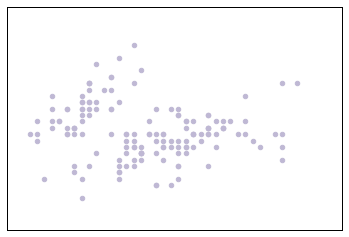

In [1]:
import numpy as np
from sklearn import svm
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()
data = iris.data[:,:2]
target=iris.target
co = {0:[0.74,0.63,0.64], 1:[0.6,0.65,0.6] ,2:[0.65, 0.62, 0.83]}
c = map(lambda x: co[x] , target)
plt.scatter(data[:,0], data[:,1], edgecolor=[0.75, 0.72, 0.83], c=[0.75, 0.72, 0.83], alpha=1)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

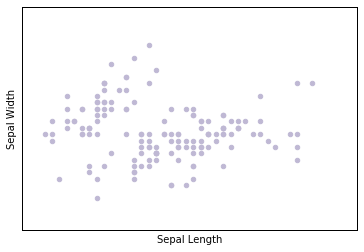

In [2]:
plt.scatter(data[:,0], data[:,1], c=[0.75, 0.72, 0.83], edgecolors=[0.75, 0.72, 0.83], alpha=1)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xticks([])
plt.yticks([])

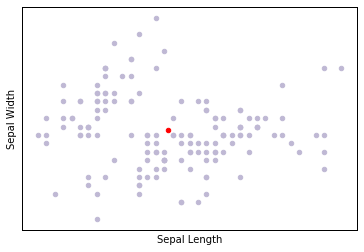

In [3]:
mu = np.mean(data, 0)
plt.scatter(data[:,0], data[:,1], c=[0.75, 0.72, 0.83], edgecolors=[0.75, 0.72, 0.83], alpha=1)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xticks([])
plt.yticks([])
plt.scatter(mu[0], mu[1], c='r', edgecolor=[1,0,0])

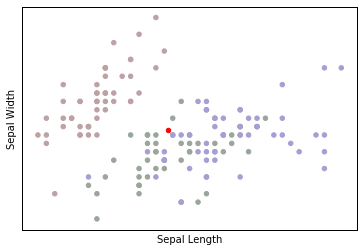

In [4]:
mu = np.mean(data, 0)
plt.scatter(data[:,0], data[:,1], c=c, edgecolors=c, alpha=1)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xticks([])
plt.yticks([])
plt.scatter(mu[0], mu[1], c='r', edgecolor=[1,0,0])

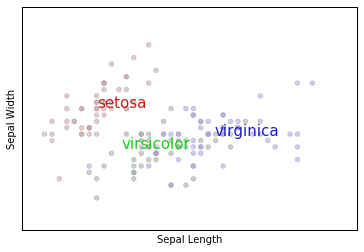

In [5]:
mu = np.mean(data, 0)
plt.scatter(data[:,0], data[:,1], c=c, edgecolors=c, alpha=0.5)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xticks([])
plt.yticks([])
mu1 = np.mean(data[:50,:], 0);mu2 = np.mean(data[50:100,:], 0);mu3 = np.mean(data[100:,:], 0)
plt.text(mu1[0], mu1[1], 'setosa', color=[0.8,0.1,0.1], size=15)
plt.text(mu2[0]-0.6, mu2[1], 'virsicolor', color=[0.1,0.8,0.1], size=15)
plt.text(mu3[0], mu3[1], 'virginica', color=[0.1,0.1,0.8], size=15)

([], <a list of 0 Text yticklabel objects>)

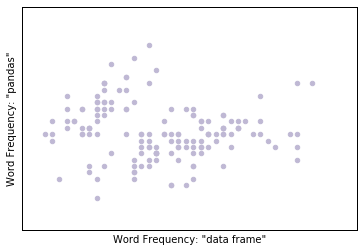

In [6]:
plt.scatter(data[:,0], data[:,1], c=[0.75, 0.72, 0.83], edgecolors=[0.75, 0.72, 0.83], alpha=1)
plt.xlabel('Word Frequency: "data frame"')
plt.ylabel('Word Frequency: "pandas"')
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

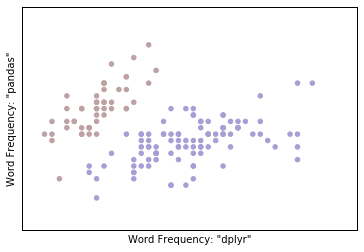

In [7]:
co = {0:[0.74,0.63,0.64], 1:[0.65, 0.62, 0.83]}
target[target==2]=1
c = map(lambda x: co[x] , target)
plt.scatter(data[:,0], data[:,1], c=c, edgecolors=c, alpha=1)
plt.xlabel('Word Frequency: "dplyr"')
plt.ylabel('Word Frequency: "pandas"')
plt.xticks([])
plt.yticks([])

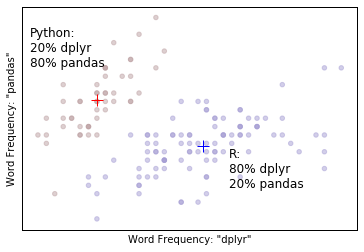

In [8]:
plt.scatter(data[:,0], data[:,1], c=c, edgecolors=c, alpha=0.5)
plt.xlabel('Word Frequency: "dplyr"')
plt.ylabel('Word Frequency: "pandas"')
plt.xticks([])
plt.yticks([])
mu1 = np.mean(data[:50,:], 0);mu2 = np.mean(data[50:,:], 0)
plt.text(mu1[0]-0.8, mu1[1]+0.4, 'Python:\n20% dplyr\n80% pandas', size=12)
plt.scatter(mu1[0], mu1[1], marker='+', c='r', s=150)
plt.text(mu2[0]+0.3, mu2[1]-0.5, 'R:\n80% dplyr\n20% pandas', size=12)
plt.scatter(mu2[0], mu2[1], marker='+', c='b', s=150)

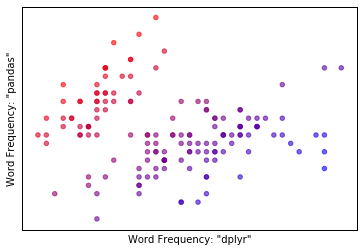

In [10]:
prob =1.14+(np.dot(data - np.array([5.45, 3.25]),np.array([-.36, .5 ])))  
prob = prob/np.max(prob)
prob=prob.reshape(-1,1)
c = prob*np.array([1,0,0])+ (1-prob)*np.array([0,0,1])
plt.xlabel('Word Frequency: "dplyr"')
plt.ylabel('Word Frequency: "pandas"')
plt.xticks([])
plt.yticks([])
plt.scatter(data[:,0], data[:,1], c=c, edgecolors=c, alpha=0.6)

Below we demonstrate, with the [20 newsgroups dataset](http://scikit-learn.org/stable/datasets/), how we can:
 - Extract **term frequency** feature from the corpus.
 - Fit the LDA model, return the **topics**, and then inspect each topic.
 - Finally we inspect the relation between the topics and the particular documents.

http://scikit-learn.org/stable/datasets/#the-20-newsgroups-text-dataset

In [1]:
from time import time

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print

We first load the data set.

In [2]:
n_features = 1000
n_topics = 10
n_top_words = 20

print "Loading dataset..."
t0 = time()
dataset = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'))
data_samples = dataset.data
print "done in %0.3fs." % (time() - t0)


Loading dataset...
done in 1.946s.


**1) Compute the term frequency for the selected words:**

In [14]:
print 'dataset.keys:', dataset.keys()
print '*'*65
print 'description:', dataset.description
print '*'*65
print 'DESCR:', dataset.DESCR
print '*'*65
print 'number of filenames:', len(dataset.filenames)
print 'filenames:', dataset.filenames[1:10]
print '*'*65
print 'unique target names:', len(set(dataset.target_names))
print 'target_names:', dataset.target_names
print '*'*65
print 'data:', dataset.data[1:3]
print '*'*65
print 'unique target codes:', len(set(dataset.target))
print 'target codes:', dataset.target[1:10] # target code for each article 

dataset.keys: ['description', 'DESCR', 'filenames', 'target_names', 'data', 'target']
*****************************************************************
description: the 20 newsgroups by date dataset
*****************************************************************
DESCR: None
*****************************************************************
number of filenames: 11314
filenames: [ 'C:\\Users\\Carlo\\scikit_learn_data\\20news_home\\20news-bydate-train\\alt.atheism\\53281'
 'C:\\Users\\Carlo\\scikit_learn_data\\20news_home\\20news-bydate-train\\talk.politics.mideast\\76350'
 'C:\\Users\\Carlo\\scikit_learn_data\\20news_home\\20news-bydate-train\\sci.crypt\\15509'
 'C:\\Users\\Carlo\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.sport.hockey\\54242'
 'C:\\Users\\Carlo\\scikit_learn_data\\20news_home\\20news-bydate-train\\soc.religion.christian\\20631'
 'C:\\Users\\Carlo\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51946'
 'C:\\Users\\Carlo\\scikit

In [17]:
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_features,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(data_samples)

In [18]:
tf.shape # csr matrix 11,314 articles x 1000 features

(11314, 1000)

**2) Fit the LDA model, return the topics, and then inspect each topic.**

In [ ]:
# remember our function:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_): # model.components_ is a 10 topic x 1000 feature array 
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print

In [70]:
# What are these numbers?
lda.components_
#print lda.components_[0].argsort() #[:-n_top_words - 1:-1]


array([[  1.00282357e-01,   2.33261482e+02,   1.00161674e-01, ...,
          5.92926087e+01,   5.88754238e+01,   4.64270470e+01],
       [  1.15399736e-01,   1.47865379e-01,   1.00100070e-01, ...,
          4.35634170e+01,   1.00280151e-01,   1.00139990e-01],
       [  1.02867422e-01,   6.82721797e+01,   1.00086115e-01, ...,
          4.41966032e+01,   8.45524421e+01,   4.71122276e+01],
       ..., 
       [  1.27867120e-01,   1.01808518e-01,   1.01462994e-01, ...,
          1.00581032e-01,   1.04941631e-01,   1.00246183e-01],
       [  1.00413163e-01,   1.08797757e-01,   1.00036301e-01, ...,
          1.40439705e+02,   1.84004247e+00,   3.84332601e+01],
       [  1.01977803e-01,   1.05557427e-01,   1.00054084e-01, ...,
          2.97079561e+02,   1.11350884e-01,   1.00504873e-01]])

In [28]:
# Remember we set up n_top_words = 20 and n_topics = 10

print("Fitting LDA models with tf features, n_features=%d..."
      % n_features)
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online', learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names() # 1000x1 => alphanumeric codes
print_top_words(lda, tf_feature_names, n_top_words) # top 20 words per topic

Fitting LDA models with tf features, n_features=1000...
done in 13.297s.

Topics in LDA model:
Topic #0:
government people mr law gun state president states public use right rights national new control american security encryption health united
Topic #1:
drive card disk bit scsi use mac memory thanks pc does video hard speed apple problem used data monitor software
Topic #2:
said people armenian armenians turkish did saw went came women killed children turkey told dead didn left started greek war
Topic #3:
year good just time game car team years like think don got new play games ago did season better ll
Topic #4:
10 00 15 25 12 11 20 14 17 16 db 13 18 24 30 19 27 50 21 40
Topic #5:
windows window program version file dos use files available display server using application set edu motif package code ms software
Topic #6:
edu file space com information mail data send available program ftp email entry info list output nasa address anonymous internet
Topic #7:
ax max b8f g9v a86 pl 145 1d

**3) Inspect the relation between the topics and the particular documents.**

We then randomly select text from the dataset and inspect how lda predict mixture of topic to it:

In [48]:
import numpy as np

indx = np.random.choice(tf.shape[0], 1)[0]
text = data_samples[indx]

print text
print '-'*88
print lda.transform(tf[indx,:] )

I don't know what Traders is claiming, but it appears to me that
the Oakland Tribune has censored gun ads in the past.  Likewise
for the San Francisco Chronicle, and I have never seen a gun
ad in the San Francisco Examiner.

Specifically, about a year ago on Thursdays, when Traders placed
its ads, the Chron. ad would not have any graphics representing
any handgun sale, though text could list it.  The Trib. would
run a graphic of a handgun.  The Examiner would not have a Traders
ad at all.

Over the past year while Oakland politicians have made a lot of noise
about measures to fight crime the Trib stopped taking the Traders
ad, then started publishing it, but without any handgun graphic, then
stopped, then started.  Since the Trib. was sold some months ago it
has not had the Traders ad.  During one of these non-ad interludes
a Traders employee told me that the Trib. had refused to take their
ads.

Yes, the usual Chron. Thursday ad was there today, with graphics
representing rifles, safe

In [49]:
topic_lst= [0, 6, -1] 

for topic in topic_lst:
    print ' '.join([tf_feature_names[i] for i in lda.components_[topic].argsort()[:-n_top_words - 1:-1]])
    print '-'*88

government people mr law gun state president states public use right rights national new control american security encryption health united
----------------------------------------------------------------------------------------
edu file space com information mail data send available program ftp email entry info list output nasa address anonymous internet
----------------------------------------------------------------------------------------
don know like just think ve want does use good people key time way make problem really work say need
----------------------------------------------------------------------------------------
